In [1]:
import os
data_dir = "../cell_images/"
os.listdir(data_dir)

['test', 'train']

# Standard Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# To read Images we will import:
from matplotlib.image import imread

# Exploring Data Paths

In [4]:
test_path = data_dir + "test"
train_path = data_dir + "train"

In [5]:
train_path

'../cell_images/train'

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
parasitized_path = train_path + "/parasitized"

In [8]:
os.listdir(parasitized_path)

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [9]:
example_image = parasitized_path + "/C100P61ThinF_IMG_20150918_144104_cell_162.png"
example_image

'../cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'

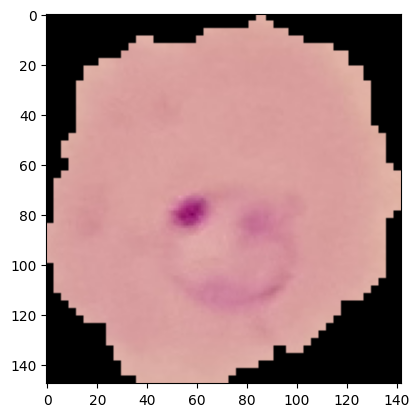

In [10]:
plt.imshow(imread(example_image));

In [11]:
uninfected_path = train_path + "/uninfected"

In [12]:
os.listdir(uninfected_path)[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

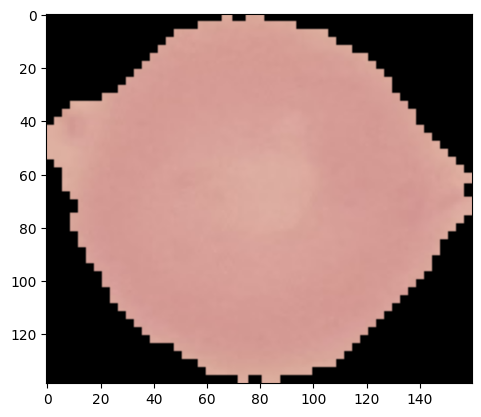

In [13]:
plt.imshow(imread(uninfected_path + "/C100P61ThinF_IMG_20150918_144104_cell_128.png"))

In [14]:
len(os.listdir(parasitized_path)), len(os.listdir(uninfected_path))

(12480, 12480)

In [15]:
len(os.listdir(test_path + "/parasitized")), len(os.listdir(test_path + "/uninfected"))

(1300, 1300)

# Finding Dimensions
And Deciding Average Dimensions

In [16]:
dim1 = []
dim2 = []

for image_names in os.listdir(test_path + "/uninfected"):
    
    img = imread(test_path + "/uninfected/" + image_names)
    d1, d2 , colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [17]:
dim1

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


In [18]:
np.mean(dim1) , np.mean(dim2)

(130.92538461538462, 130.75)

So we will Set all the images to THIS shape as this is the average dimension of the image

In [19]:
image_shape = (130,130,3)

In [20]:
130*130*3

50700

So there are going to be 50700 datapoints, that is much larger than MNIST: 784, and CIFAR-10: 32*32*3

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**NOTE** We had 60,000 images for CIFAR-10, which is quite sufficiently enough, but here, we only have 30,000 image samples,

We Definetely need more images, but cant collect more data by ourselves

So we will transform images keeping the same labels, like rotating the image, shifting the image a bit

In [22]:
image_gen = ImageDataGenerator(
    rotation_range=360,
    width_shift_range=0.1,
    height_shift_range=0.1, 
    shear_range=0.1, 
    zoom_range=0.1, 
    horizontal_flip=True, 
    fill_mode="nearest")

#### Rotation Range
        Rotating the image by how many degrees? 
        Note that rotating here by 360 is ok since our images, rn, is a circle/blob, it wont matter muchh if we rotate it much,
        BUT on images of faces, rotating by 180 degrees is not correct
#### Width_hift_range and height_shift_range:
        Shifting the image on x axis and, y_axis a bit respecively
#### Shear range: 
        Cut off some portion of the existing image
#### Zoom Range:
        Zooming the image by some percent
#### Horizontal Flip
        Flipping the image horizontally
#### FILL MODE:
        Filling the blank space how?
        Nearest: filling values by taking the pixel color values of the nearest pixel.

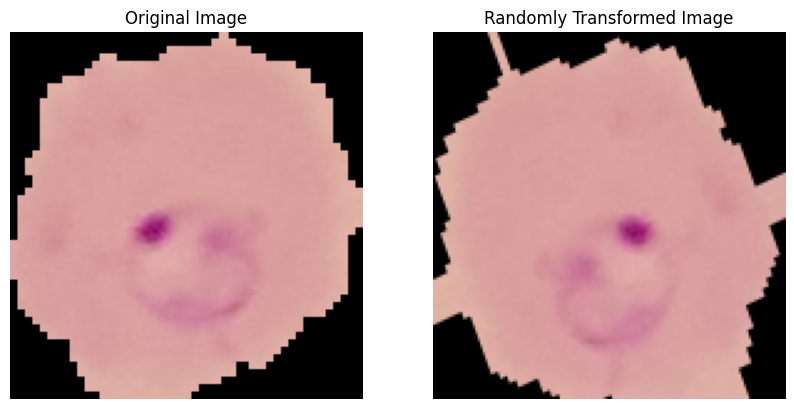

In [29]:
image = imread(example_image)

# Generate a randomly transformed version of the example image
random_transformed_image = image_gen.random_transform(image)

# Plot the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original image
axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

# Plot the randomly transformed image
axes[1].imshow(random_transformed_image)
axes[1].set_title("Randomly Transformed Image")
axes[1].axis('off')

# Display the plot
plt.show()
